## 1. Importing the libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [12]:
pd.set_option('display.max_columns', None)

## 2. Read the data

We assign dependent variable and type of our data

In [13]:
data = pd.read_excel(r'C:\Users\Shahbaz\Desktop\staff\data projects\socool ifrs\data\lgd.xlsx')

In [14]:
data.shape

(40000, 14)

In [15]:
data.head()

,Exposure Amount ($),LGD ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
0,238203,2382,729,36,3.81,47603,88,24,4,2,Rent,Home Improvement,Adjustable Rate,South
1,170008,128727,745,36,6.68,67474,71,43,4,2,Mortgage,Auto Loan,Adjustable Rate,South
2,198937,114418,681,24,8.38,77036,74,46,6,1,Own,Personal Loan,Fixed Rate,West
3,262045,2620,684,48,5.45,55083,85,24,0,0,Mortgage,Home Purchase,Adjustable Rate,West
4,243378,245105,758,72,6.64,70148,78,40,5,0,Mortgage,Debt Consolidation,Fixed Rate,North


## 3. Descriptive statistics

We drop the column which we will not use

In [16]:
data.describe(include='all')

,Exposure Amount ($),LGD ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
count,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000,40000,40000,40000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rent,Auto Loan,Adjustable Rate,North
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13420,8163,20161,10165
mean,149811.070400,52923.719550,700.667300,47.91060,6.499560,60069.306750,79.982225,30.08045,5.002275,0.998925,NaN,NaN,NaN,NaN
std,49836.964295,67024.909679,49.974161,17.00847,1.504729,19926.497499,9.986641,9.98215,2.015557,0.818530,NaN,NaN,NaN,NaN
min,-82998.000000,-20636.000000,505.000000,24.00000,0.380000,-17513.000000,37.000000,-13.00000,-5.000000,0.000000,NaN,NaN,NaN,NaN
25%,116398.000000,1662.000000,667.000000,36.00000,5.480000,46567.500000,73.000000,23.00000,4.000000,0.000000,NaN,NaN,NaN,NaN
50%,149822.500000,25808.500000,701.000000,48.00000,6.490000,60058.000000,80.000000,30.00000,5.000000,1.000000,NaN,NaN,NaN,NaN
75%,183328.000000,83867.250000,734.000000,60.00000,7.520000,73416.750000,87.000000,37.00000,6.000000,2.000000,NaN,NaN,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Exposure Amount ($)         40000 non-null  int64  
 1   LGD ($)                     40000 non-null  int64  
 2   Credit Score                40000 non-null  int64  
 3   Loan Term (Months)          40000 non-null  int64  
 4   Interest Rate (%)           40000 non-null  float64
 5   Income ($)                  40000 non-null  int64  
 6   Loan to Value Ratio (%)     40000 non-null  int64  
 7   Debt to Income Ratio (%)    40000 non-null  int64  
 8   Employment History (Years)  40000 non-null  int64  
 9   Previous Defaults           40000 non-null  int64  
 10  Home Ownership              40000 non-null  object 
 11  Loan Purpose                40000 non-null  object 
 12  Loan Type                   40000 non-null  object 
 13  Region                      400

## 4. Missing values checking

If there are missings we change

In [18]:
data.isnull().sum()

Exposure Amount ($)           0
LGD ($)                       0
Credit Score                  0
Loan Term (Months)            0
Interest Rate (%)             0
Income ($)                    0
Loan to Value Ratio (%)       0
Debt to Income Ratio (%)      0
Employment History (Years)    0
Previous Defaults             0
Home Ownership                0
Loan Purpose                  0
Loan Type                     0
Region                        0
dtype: int64

## 5. Outlier treatment

We show the outliers by boxplot in numeric columns

If there are outliers we change it with Lower and Upper bounds which:

we will get by quantile and IQR method

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


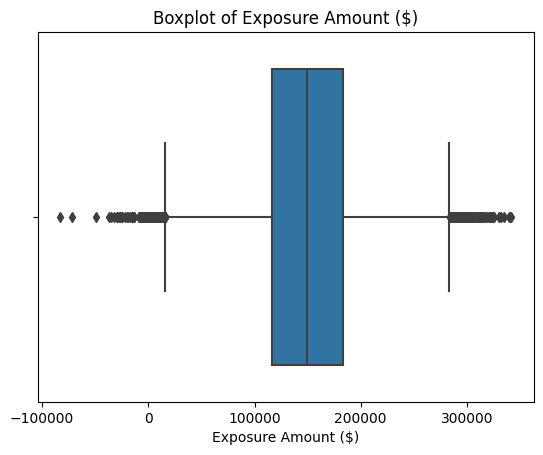

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


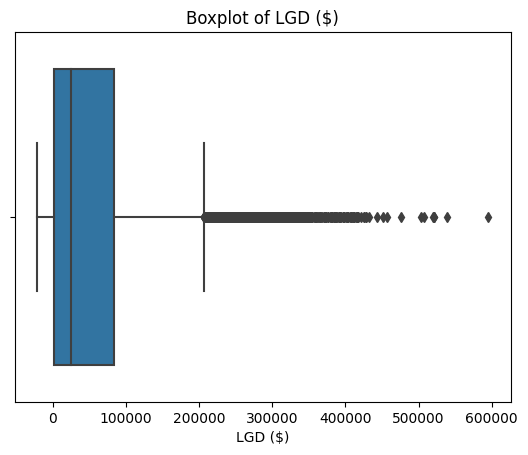

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


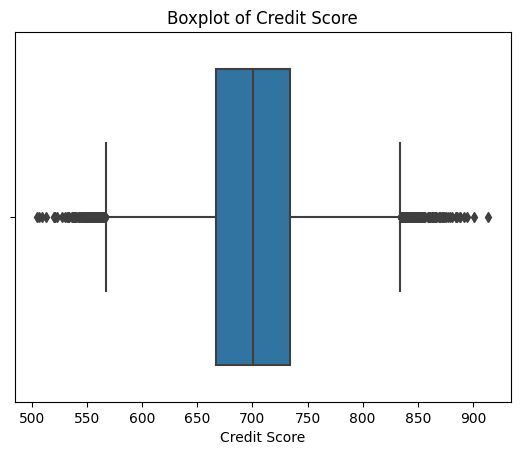

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


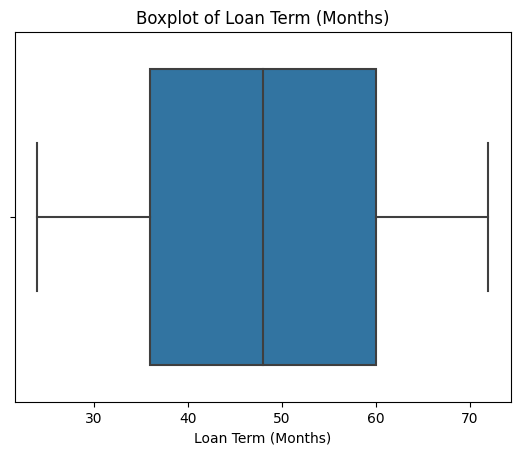

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


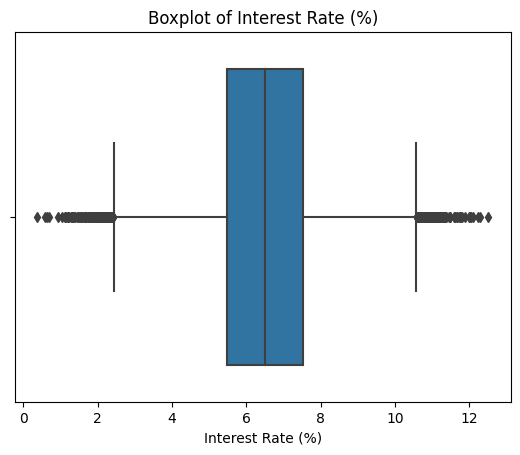

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


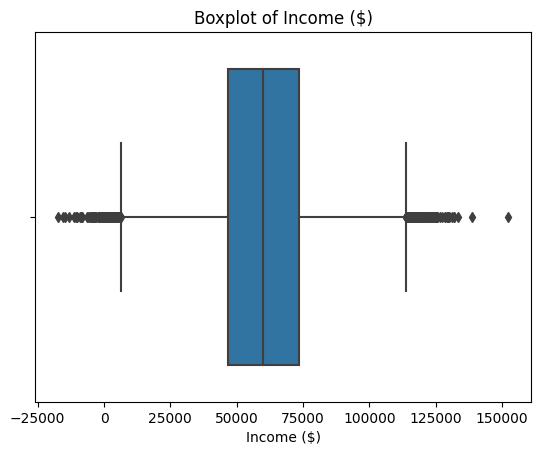

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


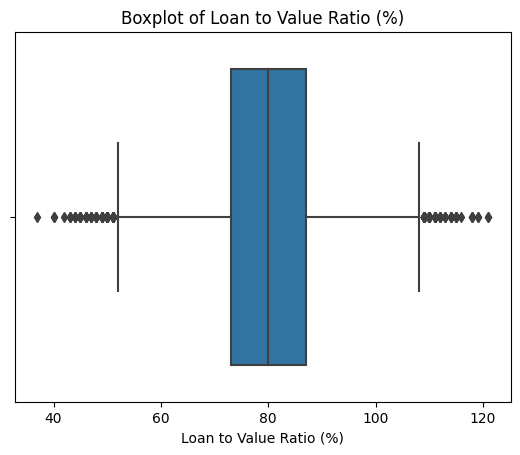

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


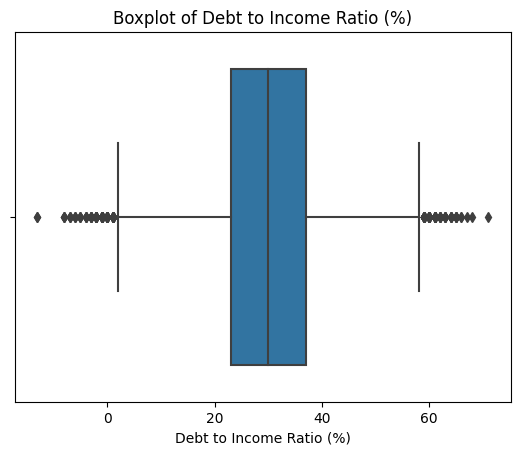

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


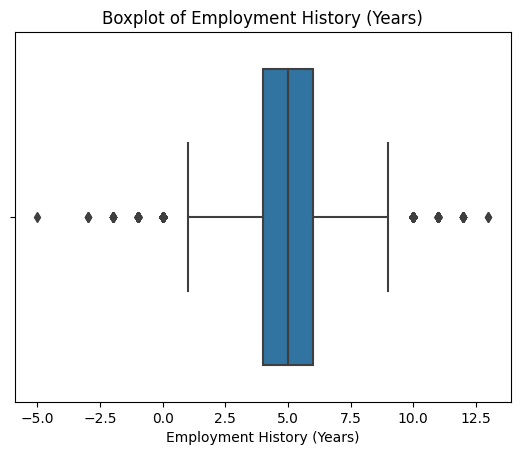

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


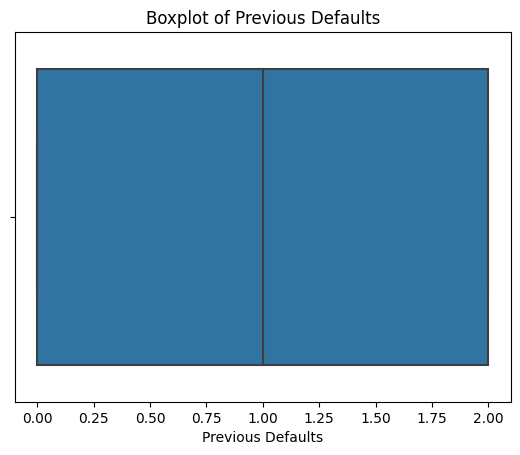

In [19]:
for i in data.columns:
    if data[i].dtypes != object:
        sns.boxplot(x=data[i], data=data)
        plt.title(f'Boxplot of {i}')
        plt.show()

In [20]:
numeric_data = data.select_dtypes(exclude='object')

q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
IQR = q3 - q1

lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

In [21]:
print("Lower bounds")
print(lower)
print('\n')
print("Upper bounds")
print(upper)

Lower bounds
Exposure Amount ($)            16003.000
LGD ($)                      -121645.875
Credit Score                     566.500
Loan Term (Months)                 0.000
Interest Rate (%)                  2.420
Income ($)                      6293.625
Loan to Value Ratio (%)           52.000
Debt to Income Ratio (%)           2.000
Employment History (Years)         1.000
Previous Defaults                 -3.000
dtype: float64


Upper bounds
Exposure Amount ($)           283723.000
LGD ($)                       207175.125
Credit Score                     834.500
Loan Term (Months)                96.000
Interest Rate (%)                 10.580
Income ($)                    113690.625
Loan to Value Ratio (%)          108.000
Debt to Income Ratio (%)          58.000
Employment History (Years)         9.000
Previous Defaults                  5.000
dtype: float64


In [22]:
for i in data.columns:
    if data[i].dtypes != object:
        data[i] = np.where(data[i]<lower[i], lower[i], data[i])
        data[i] = np.where(data[i]>upper[i], upper[i], data[i])

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


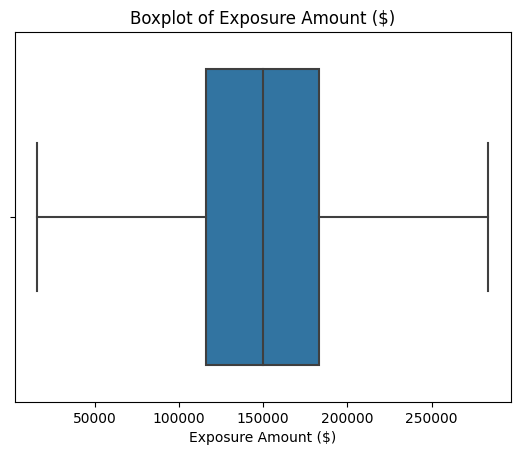

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


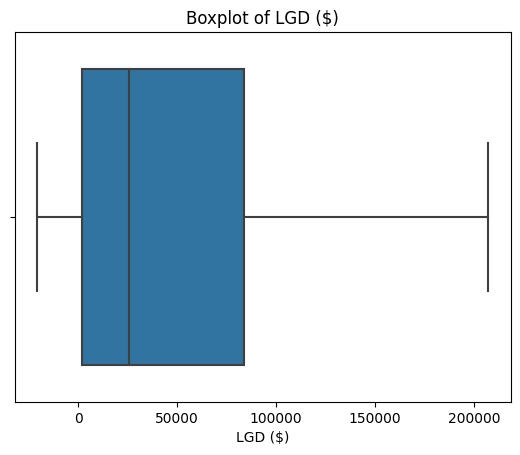

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


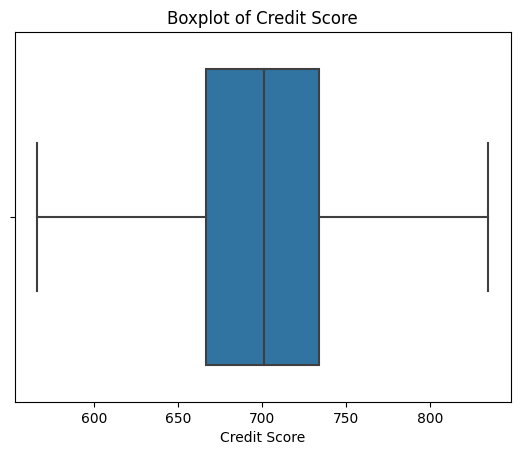

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


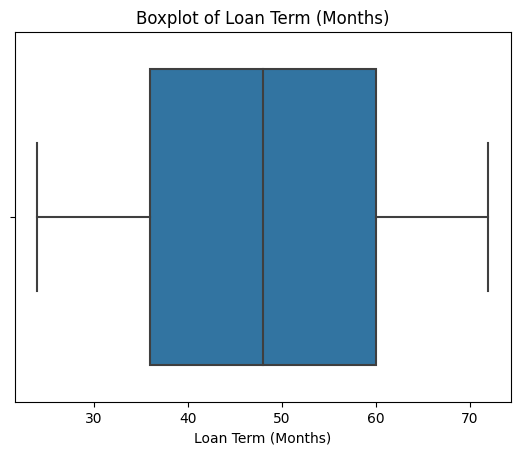

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


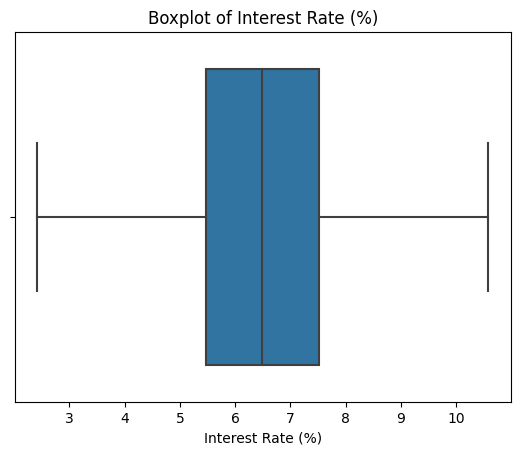

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


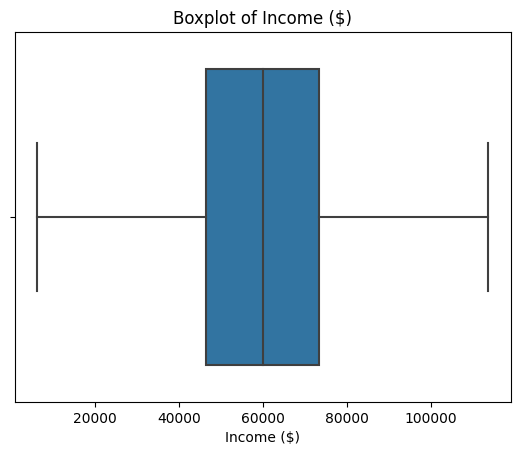

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


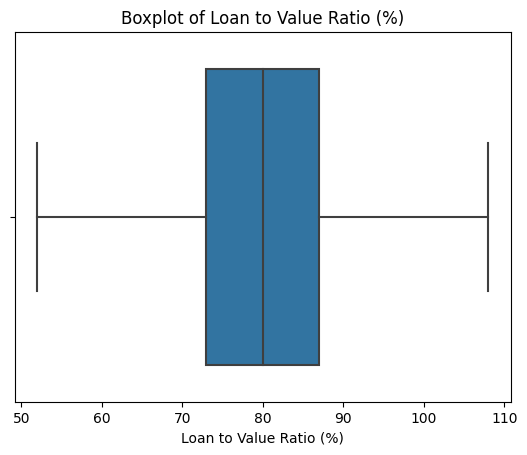

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


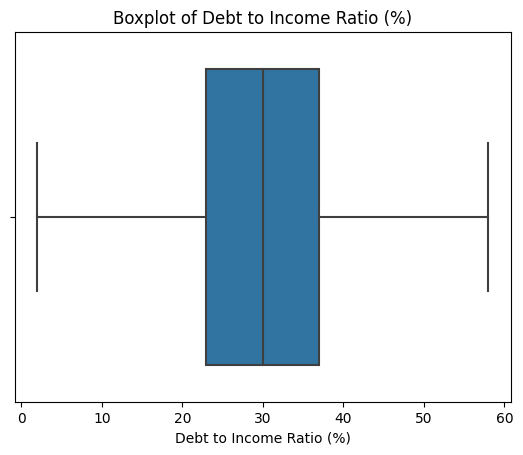

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


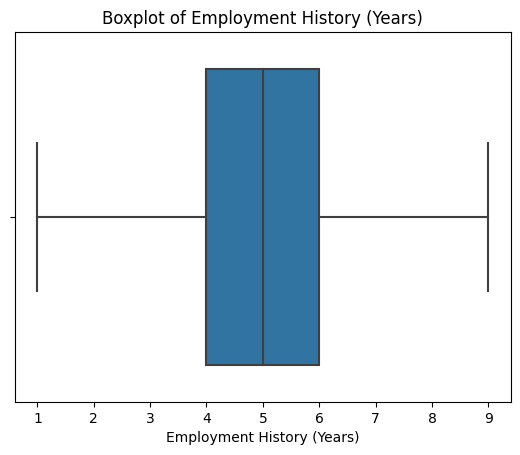

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


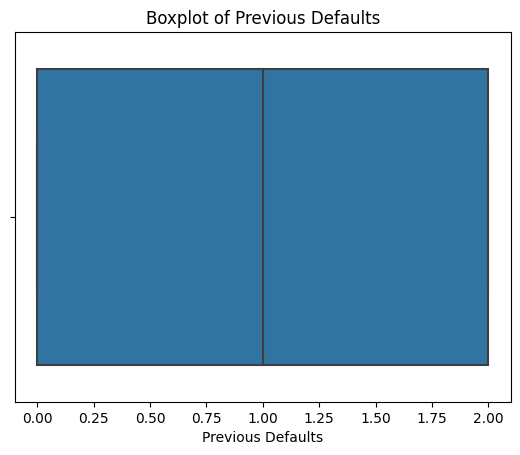

In [23]:
for i in data.columns:
    if data[i].dtypes != object:
        sns.boxplot(x=data[i], data=data)
        plt.title(f'Boxplot of {i}')
        plt.show()

In [24]:
data['Previous Defaults'].value_counts()

Previous Defaults
0.0    13421
2.0    13378
1.0    13201
Name: count, dtype: int64

# 6. Income_mean_by_Region and Previous_Defaults_mean_by_Credit_Score 

We create above columns by groupby method

In [25]:
data.columns

Index(['Exposure Amount ($)', 'LGD ($)', 'Credit Score', 'Loan Term (Months)',
       'Interest Rate (%)', 'Income ($)', 'Loan to Value Ratio (%)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type',
       'Region'],
      dtype='object')

In [26]:
statistic = 'mean'
columns = {
    'Region':'Income ($)',
    'Credit Score':'Previous Defaults'
}

for x in columns.keys():
    added_column = data.groupby([x]).agg({columns[x]:statistic})
    added_column.columns = [f'{columns[x]}_{statistic}_by_{x}']
    added_column.reset_index(inplace=True)
    data = data.merge(added_column, on = x, how='left')

In [27]:
data.head()

,Exposure Amount ($),LGD ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,Income ($)_mean_by_Region,Previous Defaults_mean_by_Credit Score
0,238203.0,2382.000,729.0,36.0,3.81,47603.0,88.0,24.0,4.0,2.0,Rent,Home Improvement,Adjustable Rate,South,60082.674340,0.938525
1,170008.0,128727.000,745.0,36.0,6.68,67474.0,71.0,43.0,4.0,2.0,Mortgage,Auto Loan,Adjustable Rate,South,60082.674340,1.022321
2,198937.0,114418.000,681.0,24.0,8.38,77036.0,74.0,46.0,6.0,1.0,Own,Personal Loan,Fixed Rate,West,60307.337702,1.030303
3,262045.0,2620.000,684.0,48.0,5.45,55083.0,85.0,24.0,1.0,0.0,Mortgage,Home Purchase,Adjustable Rate,West,60307.337702,0.985866
4,243378.0,207175.125,758.0,72.0,6.64,70148.0,78.0,40.0,5.0,0.0,Mortgage,Debt Consolidation,Fixed Rate,North,59985.178837,1.046512


## 7. Checking Data Distribution (normal or not normal distributed)



Number of bins: 15


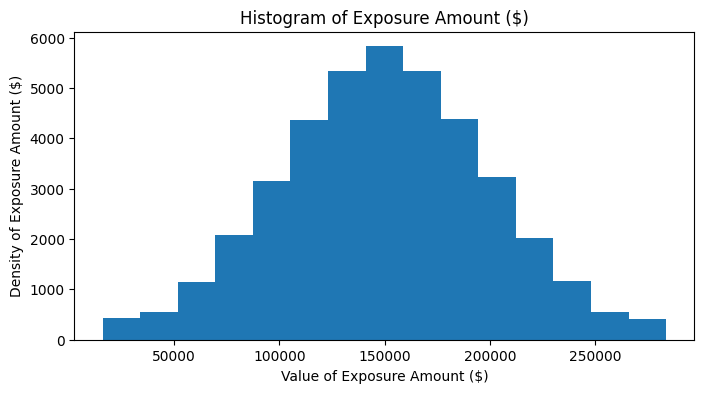

Number of bins: 15


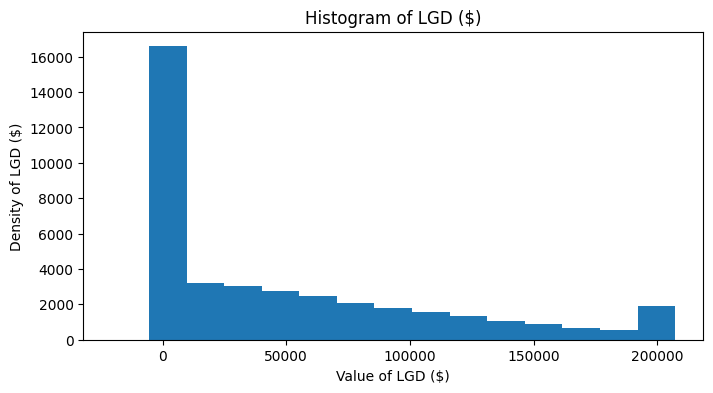

Number of bins: 15


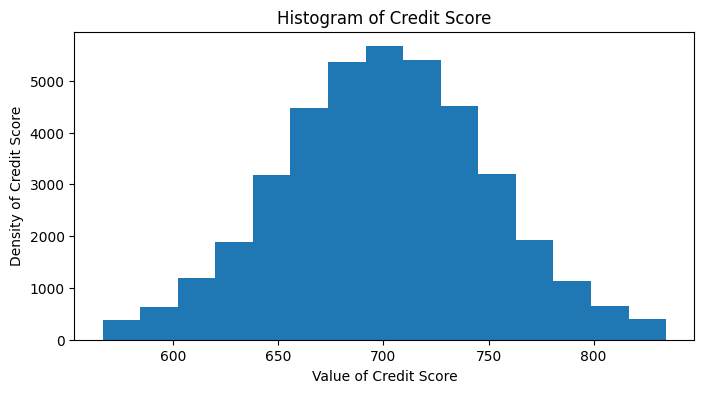

Number of bins: 15


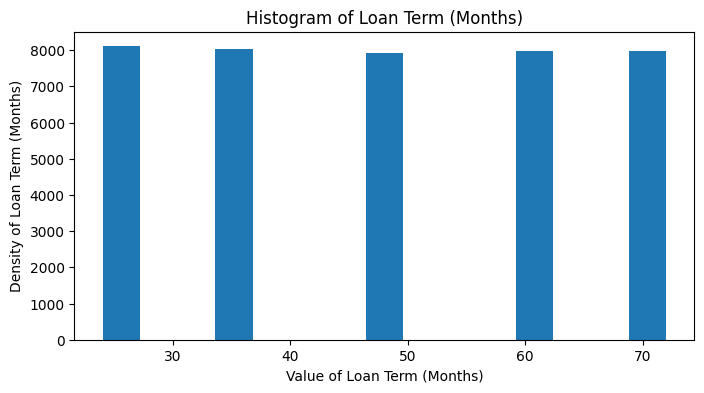

Number of bins: 15


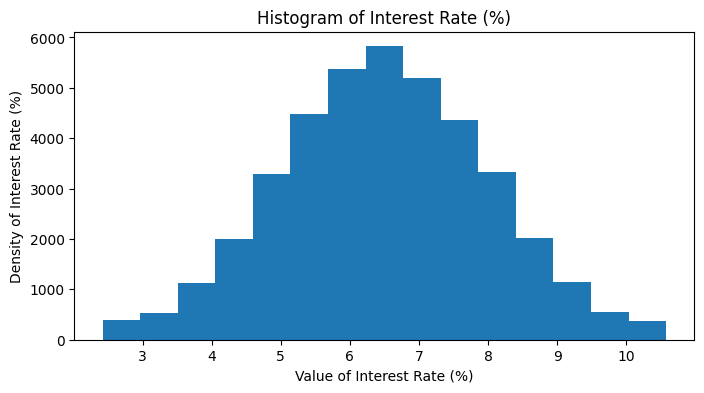

Number of bins: 15


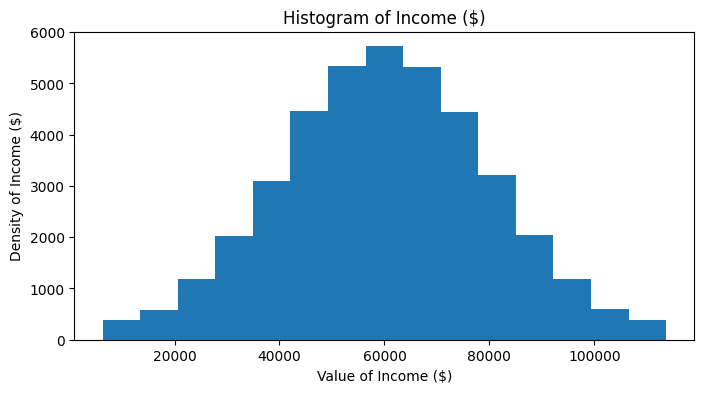

Number of bins: 15


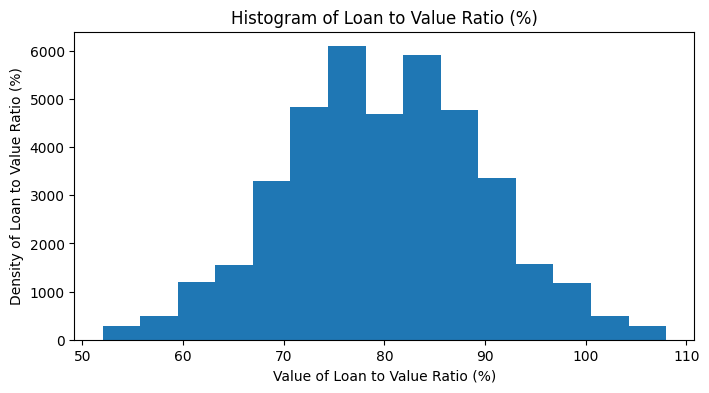

Number of bins: 15


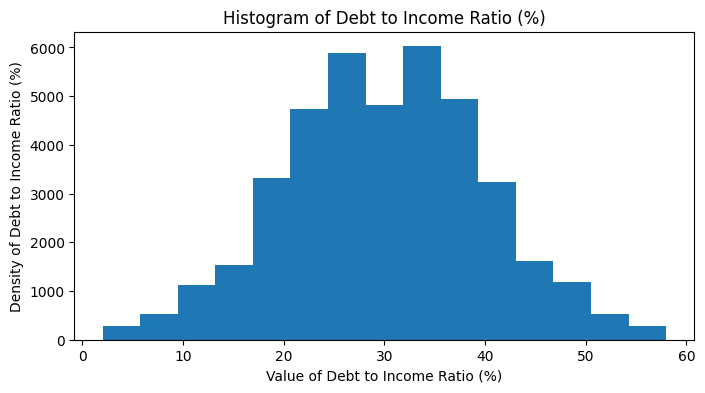

Number of bins: 15


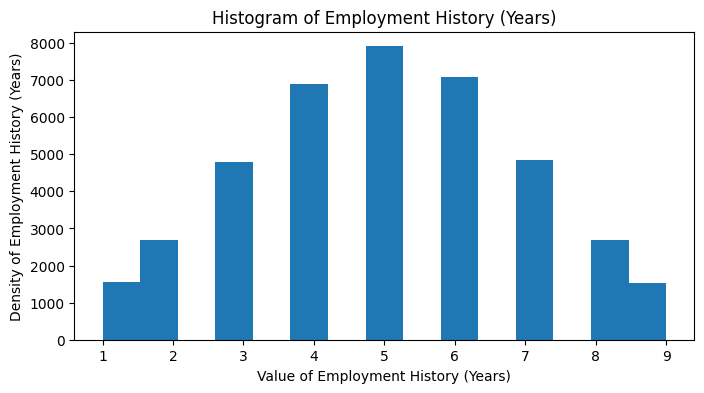

Number of bins: 15


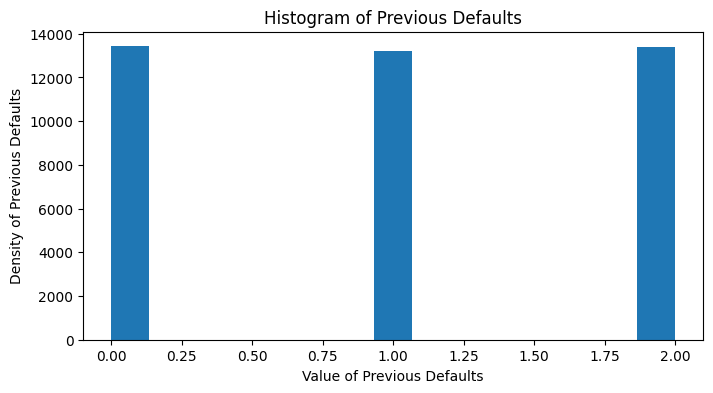

Number of bins: 15


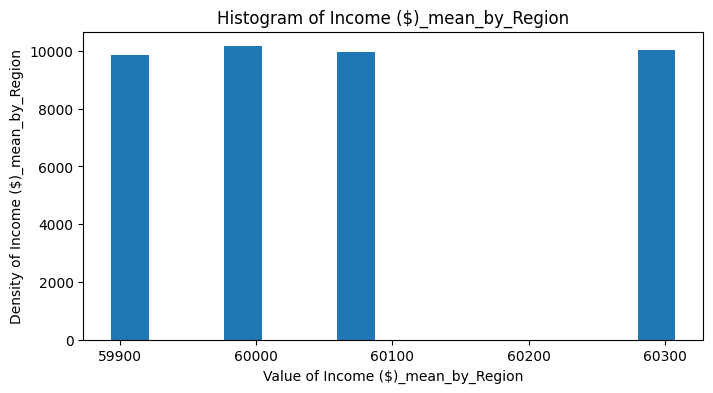

Number of bins: 15


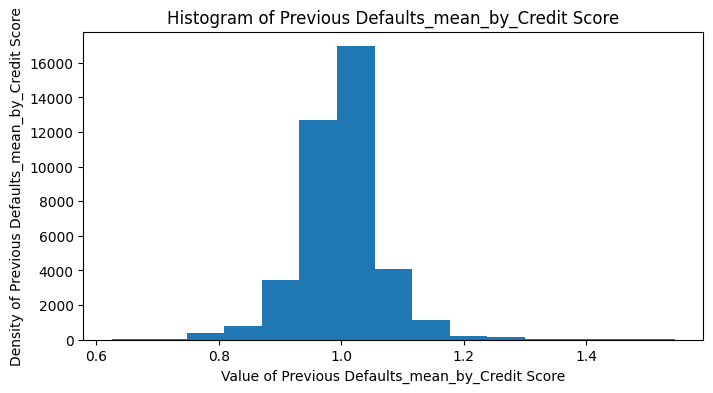

In [28]:
import math

for i in data.columns:
    if data[i].dtypes != object:
        plt.figure(figsize=(8, 4))
        num_bins = round(math.log(len(data[i]), 2))  # Calculate the number of bins, ensuring it's at least 1
        print(f"Number of bins: {num_bins}")
        plt.hist(data[i], bins=num_bins)
        plt.title(f'Histogram of {i}')
        plt.xlabel(f'Value of {i}')
        plt.ylabel(f'Density of {i}')
        plt.show()

### KS method

In [29]:
from scipy.stats import kstest
from scipy.stats import shapiro

normal_dist = []
not_normal_dist = []

for x in data.columns:
    if str(data[x].dtype).startswith(('int','float')):
        kstest_statistic, kstest_p_value = kstest(data[x], 'norm')
        print(f'column {x}')
        print('Kolmogorov Smirnov test: ')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            normal_dist.append(x)
        else:
            not_normal_dist.append(x)
        
        # print(shapiro(data[x]))

column Exposure Amount ($)
Kolmogorov Smirnov test: 
Test Statistic: 1.0
p-value: 0.0
column LGD ($)
Kolmogorov Smirnov test: 
Test Statistic: 0.998449713348428
p-value: 0.0
column Credit Score
Kolmogorov Smirnov test: 
Test Statistic: 1.0
p-value: 0.0
column Loan Term (Months)
Kolmogorov Smirnov test: 
Test Statistic: 1.0
p-value: 0.0
column Interest Rate (%)
Kolmogorov Smirnov test: 
Test Statistic: 0.9922397464494463
p-value: 0.0
column Income ($)
Kolmogorov Smirnov test: 
Test Statistic: 1.0
p-value: 0.0
column Loan to Value Ratio (%)
Kolmogorov Smirnov test: 
Test Statistic: 1.0
p-value: 0.0
column Debt to Income Ratio (%)
Kolmogorov Smirnov test: 
Test Statistic: 0.9957433287581668
p-value: 0.0
column Employment History (Years)
Kolmogorov Smirnov test: 
Test Statistic: 0.9380498680518208
p-value: 0.0
column Previous Defaults
Kolmogorov Smirnov test: 
Test Statistic: 0.505819746068543
p-value: 0.0
column Income ($)_mean_by_Region
Kolmogorov Smirnov test: 
Test Statistic: 1.0
p-val

In [30]:
normal_dist

[]

In [31]:
not_normal_dist

['Exposure Amount ($)',
 'LGD ($)',
 'Credit Score',
 'Loan Term (Months)',
 'Interest Rate (%)',
 'Income ($)',
 'Loan to Value Ratio (%)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults',
 'Income ($)_mean_by_Region',
 'Previous Defaults_mean_by_Credit Score']

## 8. Creating correlation inferences (based on data distribution)

#### Thresholds:

1. for target 10%
2. for intercorrelation 60%

In [32]:
def target_correlation(data, target, threshold=0.1):
    corr_matrix = data.corr(method='spearman', numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    variables_explaining_target = target_correlations[target_correlations].index.tolist()
    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


In [33]:
target_result = target_correlation(data, 'LGD ($)', 0.1)
target_result

,Variable,Correlation with Target
0,Exposure Amount ($),0.388404
1,Credit Score,0.459044
2,Loan Term (Months),0.314804
3,Interest Rate (%),0.156311
4,Income ($),0.379805
5,Loan to Value Ratio (%),0.228137
6,Debt to Income Ratio (%),0.300311
7,Employment History (Years),0.150966
8,Previous Defaults,0.235969


In [34]:
def intercorrelation(data, target, threshold=0.6):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
        
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]]
    })
    return result_intercorrelated_independent

In [35]:
intercorrelated_result = intercorrelation(data, 'LGD ($)', 0.6)
intercorrelated_result

,Variable 1,Variable 2


In [36]:
target_result_list = target_result.Variable.tolist()
print(target_result_list)

['Exposure Amount ($)', 'Credit Score', 'Loan Term (Months)', 'Interest Rate (%)', 'Income ($)', 'Loan to Value Ratio (%)', 'Debt to Income Ratio (%)', 'Employment History (Years)', 'Previous Defaults']


## 9. Getting WIF statistics values

We select only features which keeps VIF score only between 1-9

except above, the others will be dropped from data

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data, [
                                    'Exposure Amount ($)',
                                    # 'Credit Score',
                                    'Loan Term (Months)',
                                    # 'Interest Rate (%)',
                                    'Income ($)',
                                    # 'Loan to Value Ratio (%)',
                                    'Debt to Income Ratio (%)',
                                    'Employment History (Years)',
                                    'Previous Defaults'
]
)

vif_result


,VIF,Features
0,8.070681,Exposure Amount ($)
1,7.324425,Loan Term (Months)
2,8.120835,Income ($)
3,8.116730,Debt to Income Ratio (%)
4,6.504986,Employment History (Years)
5,2.405987,Previous Defaults


# 10. Keeping valuable features in data

variables which passed from VIF + categoric columns (features) + target variable

In [38]:
accepted_vif_columns = vif_result['Features'].tolist()

In [39]:
categoric_data_columns = data.select_dtypes(include='object').columns.tolist()

In [40]:
print(accepted_vif_columns)
print(categoric_data_columns)

['Exposure Amount ($)', 'Loan Term (Months)', 'Income ($)', 'Debt to Income Ratio (%)', 'Employment History (Years)', 'Previous Defaults']
['Home Ownership', 'Loan Purpose', 'Loan Type', 'Region']


In [41]:
result_data = data[['Exposure Amount ($)', 'Loan Term (Months)', 'Income ($)', 'Debt to Income Ratio (%)', 'Employment History (Years)', 'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type', 'Region', 'LGD ($)']]

## 11. Converting categoric variables to numeric variables (CONVERSIONS)

we do it by pd.get_dummies() method and use drop_first=True

In [42]:
data = pd.get_dummies(data=result_data, drop_first=True).astype(int)

In [43]:
data

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,LGD ($),Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,238203,36,47603,24,4,2,2382,0,1,0,1,0,0,0,0,1,0
1,170008,36,67474,43,4,2,128727,0,0,0,0,0,0,0,0,1,0
2,198937,24,77036,46,6,1,114418,1,0,0,0,0,1,1,0,0,1
3,262045,48,55083,24,1,0,2620,0,0,0,0,1,0,0,0,0,1
4,243378,72,70148,40,5,0,207175,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140,24,71515,17,3,0,771,0,0,1,0,0,0,0,1,0,0
39996,250556,72,45326,34,3,0,207175,0,1,0,0,0,0,1,0,0,1
39997,234493,60,48418,24,7,1,207175,0,1,1,0,0,0,1,0,0,1
39998,159998,36,85987,37,6,0,71285,0,0,0,0,0,1,0,0,0,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Exposure Amount ($)              40000 non-null  int32
 1   Loan Term (Months)               40000 non-null  int32
 2   Income ($)                       40000 non-null  int32
 3   Debt to Income Ratio (%)         40000 non-null  int32
 4   Employment History (Years)       40000 non-null  int32
 5   Previous Defaults                40000 non-null  int32
 6   LGD ($)                          40000 non-null  int32
 7   Home Ownership_Own               40000 non-null  int32
 8   Home Ownership_Rent              40000 non-null  int32
 9   Loan Purpose_Debt Consolidation  40000 non-null  int32
 10  Loan Purpose_Home Improvement    40000 non-null  int32
 11  Loan Purpose_Home Purchase       40000 non-null  int32
 12  Loan Purpose_Personal Loan       40000 non-nul

## 12. dividing as X and Y (INPUTS ve TARGETS)

We have assigned independent variables to X and dependent variables to Y

In [45]:
X = data.drop('LGD ($)', axis=1)
y = data['LGD ($)']

## 13. Scaling process

if there are differences between the scales of data features

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
inputs_scaled = scaler.transform(X)

data_scaled = pd.DataFrame(inputs_scaled, columns=X.columns)
data_scaled

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,1.786404,-0.700283,-0.629277,-0.612479,-0.517597,1.223032,-0.709601,1.407347,-0.501484,1.988973,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
1,0.408114,-0.700283,0.373902,1.300527,-0.517597,1.223032,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
2,0.992798,-1.405823,0.856635,1.602580,0.513114,0.001313,1.409243,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,1.008083,-0.583701,-0.575772,1.729284
3,2.268275,0.005256,-0.251652,-0.612479,-2.063665,-1.220405,-0.709601,-0.710557,-0.501484,-0.502772,2.027763,-0.496208,-0.991982,-0.583701,-0.575772,1.729284
4,1.890996,1.416336,0.508898,0.998473,-0.002242,-1.220405,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,1.008083,1.713205,-0.575772,-0.578274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.468843,-1.405823,0.577910,-1.317271,-1.032953,-1.220405,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,-0.991982,1.713205,-0.575772,-0.578274
39996,2.036071,1.416336,-0.744230,0.394366,-1.032953,-1.220405,-0.709601,1.407347,-0.501484,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39997,1.711421,0.710796,-0.588132,-0.612479,1.028470,0.001313,-0.709601,1.407347,1.994082,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39998,0.205801,-0.700283,1.308523,0.696420,0.513114,-1.220405,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,-0.991982,-0.583701,-0.575772,1.729284


## 14. Train-test-split process

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42)

## 15. Creating Linear Regression Model

Creating the model and fitting based on train data

In [48]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [49]:
reg_model.intercept_

50917.63888458763

In [50]:
reg_model.coef_

array([ 2.07435188e+04,  1.81431475e+04,  2.27033123e+04,  1.80239128e+04,
        8.96536993e+03,  1.39668182e+04,  6.20226473e+02,  4.05642345e+02,
        2.94605288e+01, -4.70262579e+02, -3.99559799e+00, -2.26956690e+01,
        2.13603603e-01, -2.02484176e+02,  1.68418899e+02,  1.99789116e+02])

## 16. Prediction and Model Performance

predicting the test and train values for this model

MAE,MSE,RMSE errors and R2_score

Checking overfitting by helping of scores for train and test

Showing the results in dataframe

In [51]:
pd.options.display.float_format = '{:.2f}'.format

In [52]:
y_pred_train = reg_model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)



y_pred_test = reg_model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)


results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,33308.55,33275.72
1,MSE,1771023888.85,1775558174.51
2,RMSE,42083.53,42137.37
3,R2,0.52,0.50


## 17. Univariate analysis

creating the model between target and each column and reporting R2_scores

we do it for showing the effect of each column on our regression model for target

we keep the columns which their effects on regression model is more than 0.01

In [53]:
results = []
for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]
    
    reg_model.fit(X_train_single_var, y_train)
    
    y_pred_train_single = reg_model.predict(X_train_single_var)
    r2_train_single = r2_score(y_train, y_pred_train_single)
    
    y_pred_test_single = reg_model.predict(X_test_single_var)
    r2_test_single = r2_score(y_test, y_pred_test_single)
    
    results.append({
        'Variable': i,
        'Train R2':r2_train_single,
        'Test R2': r2_test_single
    })

In [54]:
results = pd.DataFrame(results)

In [55]:
results

,Variable,Train R2,Test R2
0,Exposure Amount ($),0.12,0.11
1,Loan Term (Months),0.09,0.09
2,Income ($),0.14,0.13
3,Debt to Income Ratio (%),0.09,0.08
4,Employment History (Years),0.02,0.03
5,Previous Defaults,0.05,0.05
6,Home Ownership_Own,0.00,-0.00
7,Home Ownership_Rent,0.00,-0.00
8,Loan Purpose_Debt Consolidation,0.00,-0.00
9,Loan Purpose_Home Improvement,0.00,-0.00


In [56]:
accepted = [results.iloc[i]['Variable'] for i in range(len(results)) if results.iloc[i]['Train R2'] > 0.01]
accepted

['Exposure Amount ($)',
 'Loan Term (Months)',
 'Income ($)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults']

In [57]:
data_2 = data_scaled[accepted]

## 18. Creating the model again based on result features (after feature engineering part)

getting MAE,MSE,RMSE ve r2 scores for train and test data again

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data_2, y, test_size=0.2, random_state=42)

In [59]:
reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

y_pred_train = reg_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)


y_pred_test = reg_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)


results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,33314.16,33256.16
1,MSE,1771682237.02,1774279689.82
2,RMSE,42091.36,42122.20
3,R2,0.52,0.50
